<a href="https://colab.research.google.com/github/crsdvaibhav/explo-weather-prediction/blob/main/Explo_Weather_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/delhi.csv', index_col="date_time")

data.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,07:14 AM,...,14,19,0,50,0.0,1016,10,10,331,12
2009-01-01 01:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,07:14 AM,...,13,21,0,51,0.0,1016,10,10,329,13
2009-01-01 02:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,07:14 AM,...,12,22,0,52,0.0,1016,9,10,327,13
2009-01-01 03:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,07:14 AM,...,11,23,0,54,0.0,1016,9,10,326,13
2009-01-01 04:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,07:14 AM,...,11,21,2,52,0.0,1016,9,10,318,13


In [ ]:
data.shape

(96432, 24)

In [ ]:
data.apply(pd.isnull).sum()

maxtempC             0
mintempC             0
totalSnow_cm         0
sunHour              0
uvIndex              0
uvIndex.1            0
moon_illumination    0
moonrise             0
moonset              0
sunrise              0
sunset               0
DewPointC            0
FeelsLikeC           0
HeatIndexC           0
WindChillC           0
WindGustKmph         0
cloudcover           0
humidity             0
precipMM             0
pressure             0
tempC                0
visibility           0
winddirDegree        0
windspeedKmph        0
dtype: int64

In [ ]:
weather = data[["precipMM","maxtempC","mintempC","totalSnow_cm"]].copy()
weather.head()

,precipMM,maxtempC,mintempC,totalSnow_cm
date_time,,,,
2009-01-01 00:00:00,0.0,22,9,0.0
2009-01-01 01:00:00,0.0,22,9,0.0
2009-01-01 02:00:00,0.0,22,9,0.0
2009-01-01 03:00:00,0.0,22,9,0.0
2009-01-01 04:00:00,0.0,22,9,0.0


In [ ]:
weather.shape

(96432, 4)

In [ ]:
weather.apply(pd.isnull).sum()

precipMM        0
maxtempC        0
mintempC        0
totalSnow_cm    0
dtype: int64

In [ ]:
weather.dtypes

precipMM        float64
maxtempC          int64
mintempC          int64
totalSnow_cm    float64
dtype: object

In [ ]:
weather.index

Index(['2009-01-01 00:00:00', '2009-01-01 01:00:00', '2009-01-01 02:00:00',
       '2009-01-01 03:00:00', '2009-01-01 04:00:00', '2009-01-01 05:00:00',
       '2009-01-01 06:00:00', '2009-01-01 07:00:00', '2009-01-01 08:00:00',
       '2009-01-01 09:00:00',
       ...
       '2020-01-01 14:00:00', '2020-01-01 15:00:00', '2020-01-01 16:00:00',
       '2020-01-01 17:00:00', '2020-01-01 18:00:00', '2020-01-01 19:00:00',
       '2020-01-01 20:00:00', '2020-01-01 21:00:00', '2020-01-01 22:00:00',
       '2020-01-01 23:00:00'],
      dtype='object', name='date_time', length=96432)

In [ ]:
weather.index = pd.to_datetime(weather.index)

weather.index

DatetimeIndex(['2009-01-01 00:00:00', '2009-01-01 01:00:00',
               '2009-01-01 02:00:00', '2009-01-01 03:00:00',
               '2009-01-01 04:00:00', '2009-01-01 05:00:00',
               '2009-01-01 06:00:00', '2009-01-01 07:00:00',
               '2009-01-01 08:00:00', '2009-01-01 09:00:00',
               ...
               '2020-01-01 14:00:00', '2020-01-01 15:00:00',
               '2020-01-01 16:00:00', '2020-01-01 17:00:00',
               '2020-01-01 18:00:00', '2020-01-01 19:00:00',
               '2020-01-01 20:00:00', '2020-01-01 21:00:00',
               '2020-01-01 22:00:00', '2020-01-01 23:00:00'],
              dtype='datetime64[ns]', name='date_time', length=96432, freq=None)

In [ ]:
weather["maxtempC"] = weather["maxtempC"].resample('D').mean()
weather["mintempC"] = weather["mintempC"].resample('D').mean()
weather["precipMM"] = weather["precipMM"].resample('D').sum()
weather["totalSnow_cm"] = weather["totalSnow_cm"].resample('D').sum()

weather = weather.iloc[::24,:]

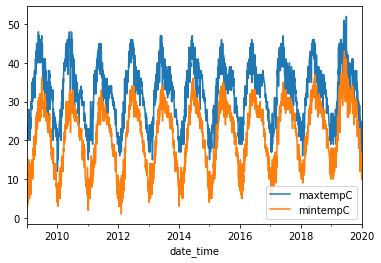

In [ ]:
weather[["maxtempC","mintempC"]].plot()

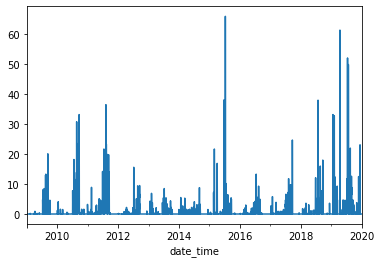

In [ ]:
weather["precipMM"].plot()

In [ ]:
weather.groupby(weather.index.year).sum()["precipMM"]

date_time
2009    175.8
2010    409.7
2011    550.5
2012    149.9
2013    111.8
2014     85.1
2015    281.7
2016    144.0
2017    150.2
2018    277.5
2019    756.6
2020      0.0
Name: precipMM, dtype: float64

In [ ]:
weather["target"] = weather.shift(-1)["maxtempC"]
weather = weather.iloc[:-1,:].copy()
weather.tail()

,precipMM,maxtempC,mintempC,totalSnow_cm,target
date_time,,,,,
2019-12-27,0.0,22.0,15.0,0.0,22.0
2019-12-28,0.0,22.0,13.0,0.0,19.0
2019-12-29,0.0,19.0,14.0,0.0,20.0
2019-12-30,0.0,20.0,14.0,0.0,17.0
2019-12-31,0.0,17.0,10.0,0.0,19.0


In [ ]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=0.1)

In [ ]:
predictors = ["precipMM","maxtempC","mintempC"]

In [ ]:
train = weather.loc[:'2017-12-31 23:00:00']

test = weather.loc['2018-01-01 00:00:00':]

In [ ]:
reg.fit(train[predictors],train["target"])

Ridge(alpha=0.1)

In [ ]:
predictions = reg.predict(test[predictors])

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(test["target"], predictions)

1.455950806193819

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test["target"], predictions)

3.9569154054283544

In [ ]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predicted"]

combined

,actual,predicted
date_time,,
2018-01-01,20.0,21.489059
2018-01-02,21.0,20.519558
2018-01-03,22.0,21.438050
2018-01-04,21.0,22.356541
2018-01-05,21.0,21.438050
...,...,...
2019-12-27,22.0,22.560578
2019-12-28,19.0,22.458559
2019-12-29,20.0,19.754094


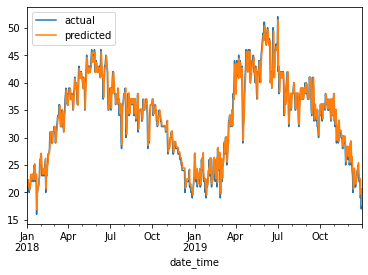

In [ ]:
combined.plot()

In [ ]:
reg.coef_

array([0.00103995, 0.91849151, 0.05100904])

In [ ]:
def create_predictions(predictors, weather, reg):
  train = weather.loc[:'2017-12-31 23:00:00']
  test = weather.loc['2018-01-01 00:00:00':]
  reg.fit(train[predictors],train["target"])
  predictions = reg.predict(test[predictors])
  error = mean_squared_error(test["target"], predictions)
  combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
  combined.columns = ["actual", "predicted"]

  return error,combined




In [ ]:
weather["month_max"] = weather["maxtempC"].rolling(30).mean()
weather["month_day_max"] = weather["month_max"] / weather["maxtempC"]
weather["max_min"] = weather["maxtempC"] / weather["mintempC"]

weather.head(30)

,precipMM,maxtempC,mintempC,totalSnow_cm,target,month_max,month_day_max,max_min
date_time,,,,,,,,
2009-01-01,0.0,22.0,9.0,0.0,22.0,NaN,NaN,2.444444
2009-01-02,0.0,22.0,5.0,0.0,22.0,NaN,NaN,4.400000
2009-01-03,0.0,22.0,6.0,0.0,20.0,NaN,NaN,3.666667
2009-01-04,0.0,20.0,8.0,0.0,22.0,NaN,NaN,2.500000
2009-01-05,0.0,22.0,11.0,0.0,22.0,NaN,NaN,2.000000
2009-01-06,0.0,22.0,8.0,0.0,21.0,NaN,NaN,2.750000
2009-01-07,0.0,21.0,7.0,0.0,22.0,NaN,NaN,3.000000
2009-01-08,0.0,22.0,5.0,0.0,20.0,NaN,NaN,4.400000
2009-01-09,0.0,20.0,3.0,0.0,22.0,NaN,NaN,6.666667


In [ ]:
weather = weather.iloc[29:,:].copy()

weather.head()

,precipMM,maxtempC,mintempC,totalSnow_cm,target,month_max,month_day_max,max_min
date_time,,,,,,,,
2009-01-30,0.0,24.0,9.0,0.0,23.0,22.633333,0.943056,2.666667
2009-01-31,0.0,23.0,9.0,0.0,23.0,22.666667,0.985507,2.555556
2009-02-01,0.0,23.0,9.0,0.0,23.0,22.700000,0.986957,2.555556
2009-02-02,0.0,23.0,5.0,0.0,26.0,22.733333,0.988406,4.600000
2009-02-03,0.0,26.0,6.0,0.0,27.0,22.933333,0.882051,4.333333


In [ ]:
predictors = ["precipMM","maxtempC","mintempC", "month_day_max", "max_min"]

error, combined = create_predictions(predictors, weather, reg)
error

3.868004863023604

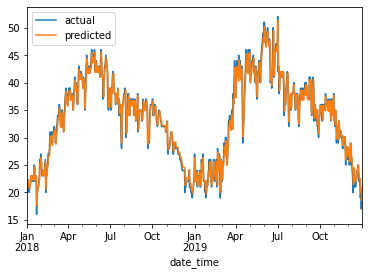

In [ ]:
combined.plot()

In [ ]:
reg.coef_

array([-2.11712601e-03,  1.00485219e+00, -1.89222339e-02,  3.82949439e+00,
       -4.40609253e-02])

In [ ]:
weather.corr()["target"]

precipMM        -0.012307
maxtempC         0.967994
mintempC         0.884671
totalSnow_cm          NaN
target           1.000000
month_max        0.896840
month_day_max   -0.312827
max_min         -0.560978
Name: target, dtype: float64

In [ ]:
combined["diff"] = (combined["actual"] - combined["predicted"]).abs()
combined.sort_values("diff", ascending=False).head(10)

,actual,predicted,diff
date_time,,,
2019-07-02,42.0,51.279586,9.279586
2019-04-16,29.0,36.068264,7.068264
2018-01-22,16.0,22.986926,6.986926
2019-06-15,40.0,46.680894,6.680894
2019-02-20,28.0,21.329032,6.670968
2018-08-31,31.0,37.621421,6.621421
2019-04-15,36.0,42.470844,6.470844
2019-07-01,52.0,45.767858,6.232142
2018-09-21,28.0,34.006394,6.006394
